# HR Attrition Analysis

This notebook analyzes the IBM HR employee attrition dataset to understand the factors influencing attrition, explore trends using visualizations, and build a predictive model using machine learning techniques.

Dataset Source: Kaggle - WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
import numpy as np
import seaborn as snb
from matplotlib import pyplot as plt

In [44]:
with open("requirements.txt", "w") as f:
    f.write("""pandas\nnumpy\nmatplotlib\nseaborn\nscikit-learn""")

In [45]:
pip install -r requirements.txt

In [ ]:
import pandas as pd

from google.colab import files
files.upload()


Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xd1a4O\x0e\x03\xbb\xda\xff\xff\xff\xff\xff\xff\xff\xff%\x00\x14\x00WA_Fn-UseC_-HR-Employee-Attrition.csv\x01\x00\x10\x00\x89z\x03\x00\x00\x00\x00\x00\x9e\xc7\x00\x00\x00\x00\x00\x00\x94\xbd\xcb\xae\xa5Gn.87\xa0w\xa8Q\x8fV\x03q\xbf\x0c\xcf\xf1\xa5\xed\x86\xab|`\x1b8\xf0\xa8\x91V\xa5]\x82U\xca\xea\x94T\xe8z\xb6\x1e\xf4#\x9dW\xe8 \x19A\xf2\xff\x7fF\xac\x9d\x96Q\xcaL\xe5\xde\x9b+\x82\xc1\xcb\xc7\x8f\xe4\xff\xfa\x7f\xff\xbf\xff\xf6\x9f\x9f_\xff\xed\x97_\xbe\xfe\xf0\xcb\x0f_~z\xfd\xf7_\x7f\xfe\xe1\xa7\xcf?\xff\xfc\xaf_?\xfd\xf9\xf3\x8f\xaf\xbf\xf9\xf4\xc3\x8f\x7f\xf9\xe7O\xbf|~\xfd\xcd\xe7?}\xfa\xfa\xcb\x1f?\xff\xf4\xcb\xebo~\xf8\xf9\x97O?}\xff\xf9\xef\xbe~\xf9\xe3\xdf\x7f\xf9\xe3\xe7\xd7\xdf\xfe\xfe\xd7\xef?\xe1\x97\xf3\xaf\xfe\xee\x87\xcf?\xfe\xfe\xf5\xb7\x7f\xfc\xd3\x8f_\xfe\xf2\xf9\xf3_\x7f\xf9u|\xdd\xfa\xdd\xef~\xfd\xe3\xbf\x7f\xfe\xfa\xfa\xdb\x9f\xfe\xfc\xc3\xd7/?\xc1\xb7\xfc\x97\xf15?\xff\xc7\xa7\xef\xf1{\xfc\x1f\x9f\x7f\xfa\xfd\xf8\xc

In [ ]:
import zipfile

# Replace with your exact file name if different
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("hr_data")  # Extracts files into 'hr_data/' folder



In [ ]:
!ls hr_data


WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
df = pd.read_csv("hr_data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='all')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
df["YearsSinceLastPromotion"].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:


# Step 1: Create income ranges (low, medium, high)
df["Salary"] = pd.cut(df["MonthlyIncome"], bins=3, labels=["Low", "Medium", "High"])

# Step 2: Group by these ranges and get mean of numerical columns
df.groupby("Salary").mean(numeric_only=True)



/tmp/ipython-input-11-4225260376.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Salary").mean(numeric_only=True)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Salary,,,,,,,,,,,,,,,,,,,,,
Low,34.571565,799.522901,9.208015,2.872137,1.0,1032.101145,2.734733,66.284351,2.738550,1.495229,...,2.678435,80.0,0.792939,8.149809,2.814885,2.751908,5.320611,3.464695,1.543893,3.447519
Medium,39.988764,823.374532,9.835206,2.973783,1.0,1015.352060,2.640449,64.812734,2.677903,2.925094,...,2.797753,80.0,0.827715,15.213483,2.786517,2.771536,9.520599,5.910112,3.382022,5.509363
High,47.548387,786.535484,7.980645,3.083871,1.0,992.329032,2.774194,65.090323,2.761290,4.425806,...,2.793548,80.0,0.741935,25.664516,2.716129,2.806452,14.090323,6.503226,4.483871,6.303226


### Report:
- MonthlyIncome has been binned into Low, Medium, and High salary categories for easier analysis.


In [ ]:
df.groupby(["Department"]).mean(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,...,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,...,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,...,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [ ]:
df.groupby(["Department","Salary"]).mean(numeric_only=True)

/tmp/ipython-input-13-3660638453.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Department","Salary"]).mean(numeric_only=True)


Age   DailyRate  DistanceFromHome  \
Department             Salary                                            
Human Resources        Low     34.891304  760.804348          7.282609   
                       Medium  40.166667  735.833333         15.000000   
                       High    48.727273  721.363636         11.181818   
Research & Development Low     34.755650  802.217514          9.242938   
                       Medium  40.630137  821.760274          9.821918   
                       High    47.280374  817.168224          7.570093   
Sales                  Low     34.078231  799.091837          9.425170   
                       Medium  39.165217  829.991304          9.582609   
                       High    47.972973  717.324324          8.216216   

                               Education  EmployeeCount  EmployeeNumber  \
Department             Salary                                             
Human Resources        Low      2.847826            1.0     1232.608696   
                       Medium   3.166667            1.0     1264.833333   
                       High     3.363636            1.0     1058.454545   
Research & Development Low      2.879944            1.0     1009.680791   
                       Medium   2.924658            1.0      997.157534   
                       High     2.990654            1.0      998.233645   
Sales                  Low      2.857143            1.0     1054.721088   
                       Medium   3.026087            1.0     1025.434783   
                       High     3.270270            1.0      955.594595   

                               EnvironmentSatisfaction  HourlyRate  \
Department             Salary                                        
Human Resources        Low                    2.608696   64.717391   
                       Medium                 2.500000   60.000000   
                       High                   3.090909   64.909091   
Research & Development Low                    2.751412   66.659605   
                       Medium                 2.684932   65.102740   
                       High                   2.775701   64.364486   
Sales                  Low                    2.714286   65.625850   
                       Medium                 2.591304   64.695652   
                       High                   2.675676   67.243243   

                               JobInvolvement  JobLevel  ...  \
Department             Salary                            ...   
Human Resources        Low           2.760870  1.282609  ...   
                       Medium        2.333333  3.000000  ...   
                       High          2.909091  4.636364  ...   
Research & Development Low           2.751412  1.396893  ...   
                       Medium        2.691781  2.993151  ...   
                       High          2.747664  4.429907  ...   
Sales                  Low           2.704082  1.765306  ...   
                       Medium        2.678261  2.834783  ...   
                       High          2.756757  4.351351  ...   

                               RelationshipSatisfaction  StandardHours  \
Department             Salary                                            
Human Resources        Low                     2.978261           80.0   
                       Medium                  2.833333           80.0   
                       High                    2.545455           80.0   
Research & Development Low                     2.683616           80.0   
                       Medium                  2.767123           80.0   
                       High                    2.794393           80.0   
Sales                  Low                     2.619048           80.0   
                       Medium                  2.834783           80.0   
                       High                    2.864865           80.0   

                               StockOptionLevel  TotalWorkingYears  \
Department             Salary      

# **Count Analysis**

Analysis of income with overall data


<Axes: xlabel='Salary', ylabel='count'>

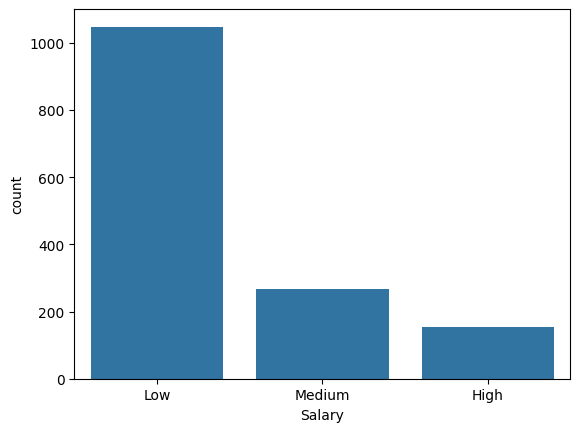

In [ ]:
snb.countplot(data = df , x = 'Salary')

<Axes: xlabel='Department', ylabel='count'>

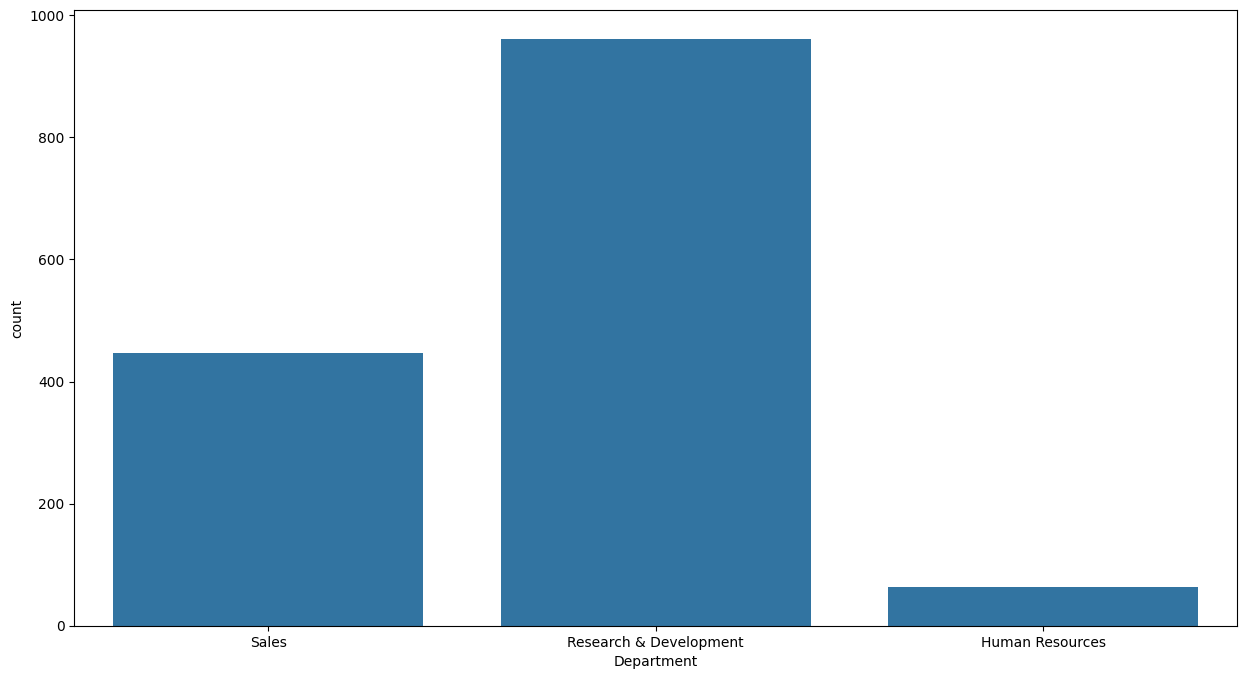

In [ ]:
plt.figure(figsize=(15,8))
snb.countplot(data = df , x = 'Department')

<Axes: xlabel='Department', ylabel='count'>

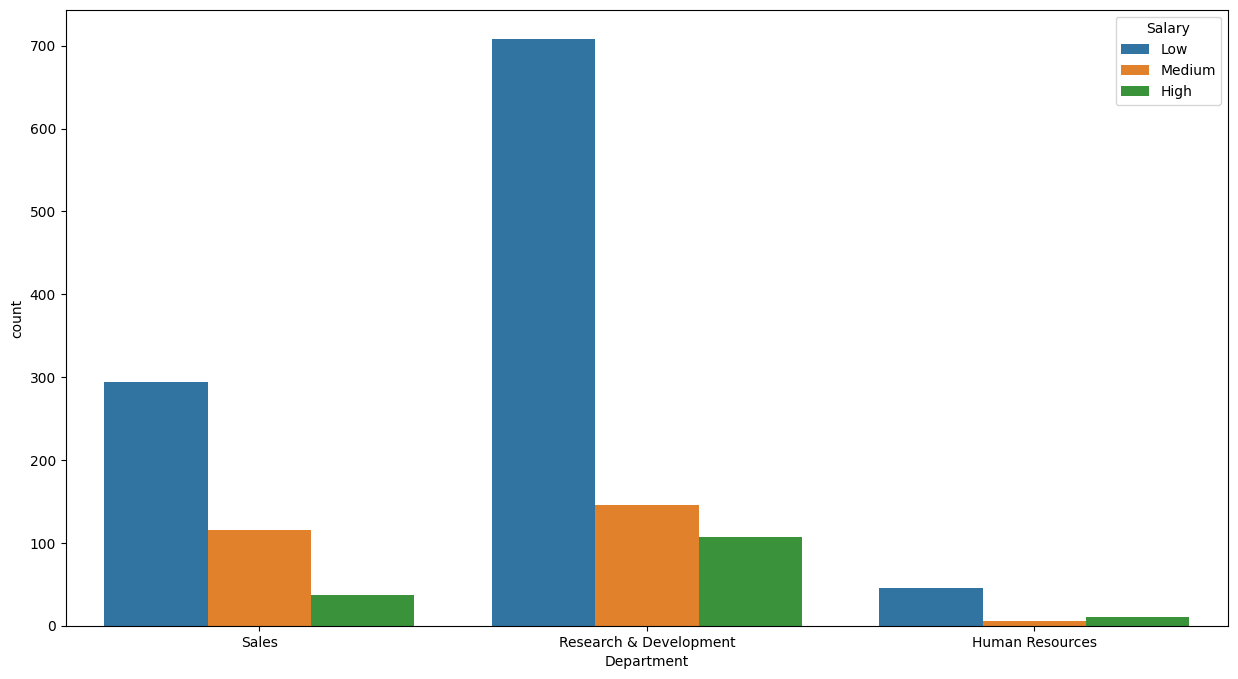

In [ ]:
plt.figure(figsize=(15,8))
snb.countplot(data = df , x = 'Department',hue="Salary")


<Axes: xlabel='Salary', ylabel='count'>

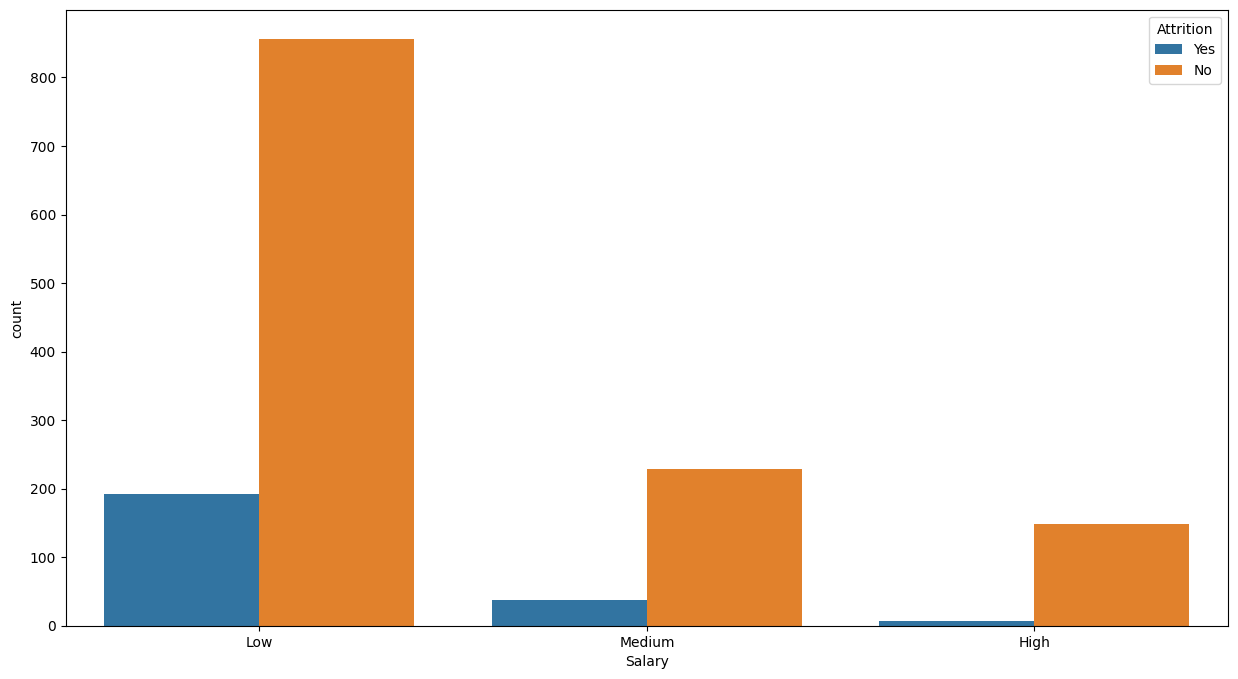

In [ ]:
plt.figure(figsize=(15,8))
snb.countplot(data=df, x="Salary", hue="Attrition")


### Report:
- Employees in the **Low salary category** show significantly higher attrition.
- Higher salary groups are more likely to stay, suggesting that salary is a major retention factor.


<Axes: xlabel='Salary', ylabel='count'>

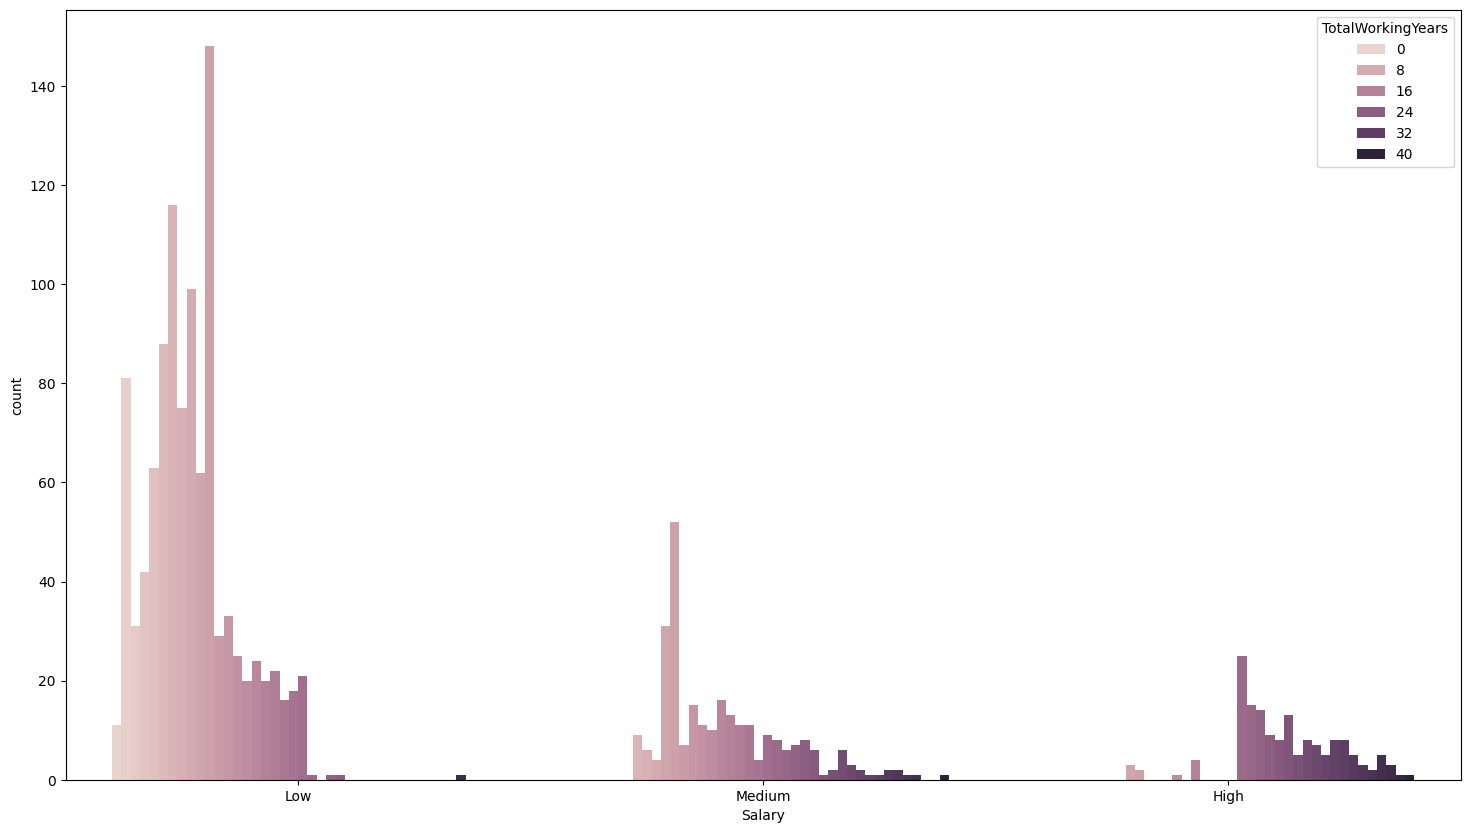

In [ ]:
#TotalWorkingYears
plt.figure(figsize=(18,10))
snb.countplot(data = df , x = 'Salary',hue="TotalWorkingYears")

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

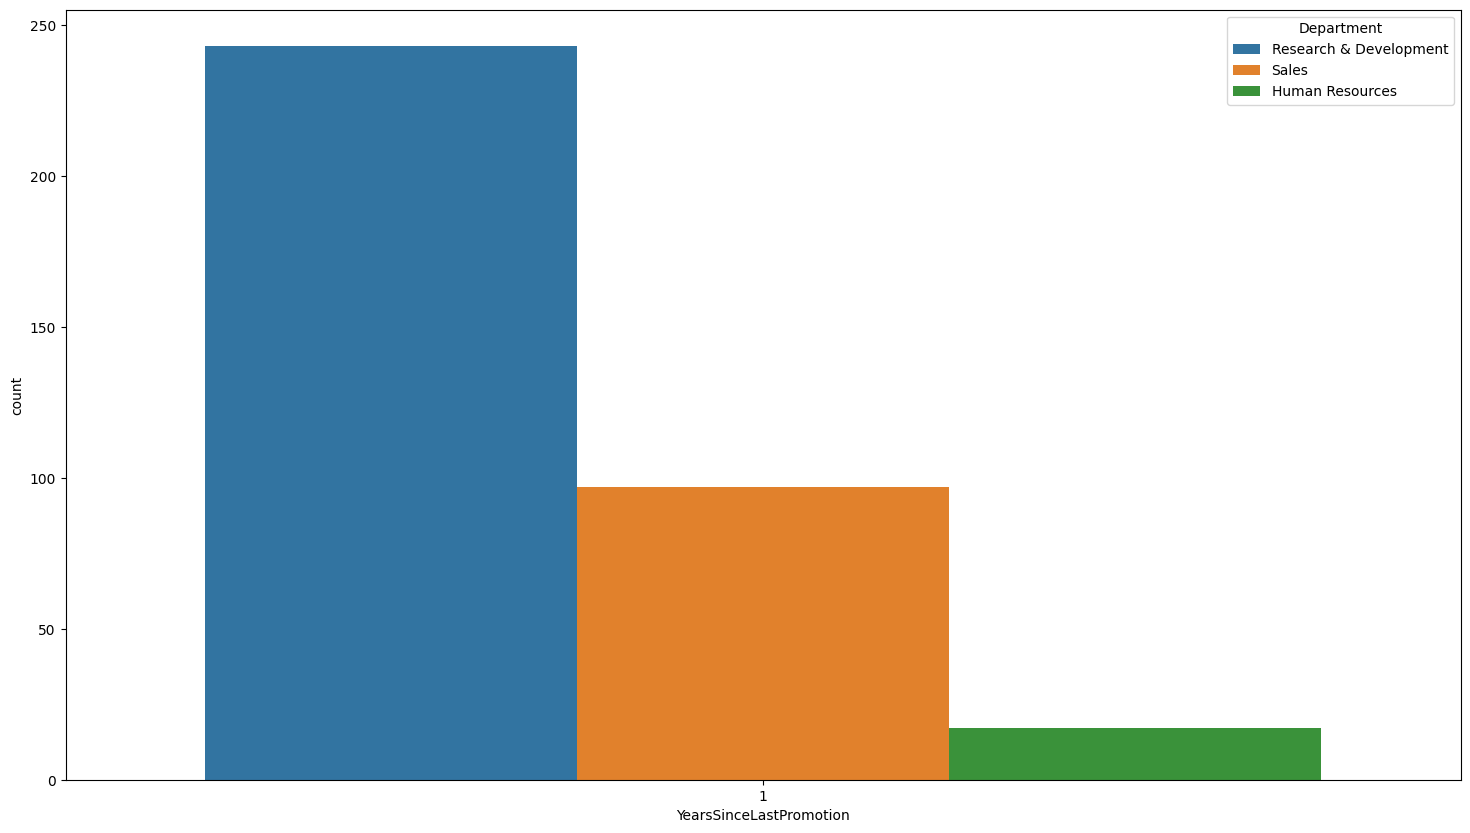

In [ ]:
plt.figure(figsize=(18,10))
df1 = df[df["YearsSinceLastPromotion"]==True]
snb.countplot(data = df1 , x = 'YearsSinceLastPromotion',hue="Department")

**Boxplot** **analysis**

<Axes: xlabel='Salary', ylabel='JobSatisfaction'>

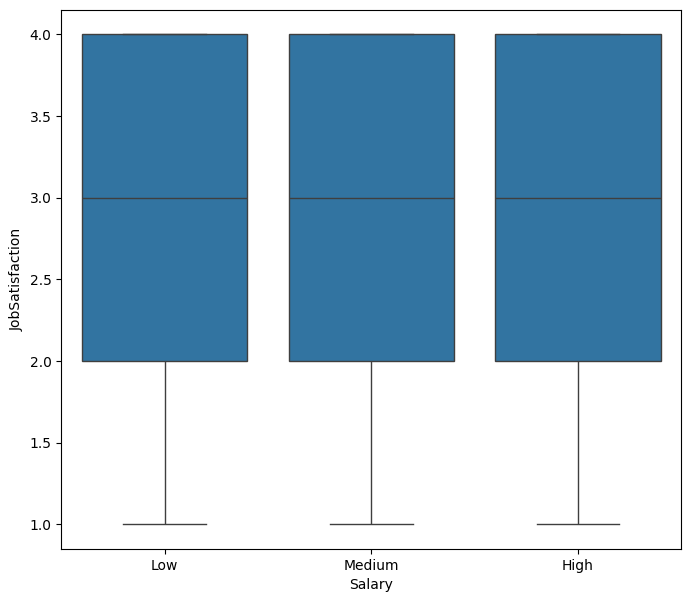

In [ ]:
plt.figure(figsize=(8,7))
snb.boxplot( y = 'JobSatisfaction' ,x ='Salary' , data = df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '36'),
  Text(35, 0, '37'),
  Text(36, 0, '40')])

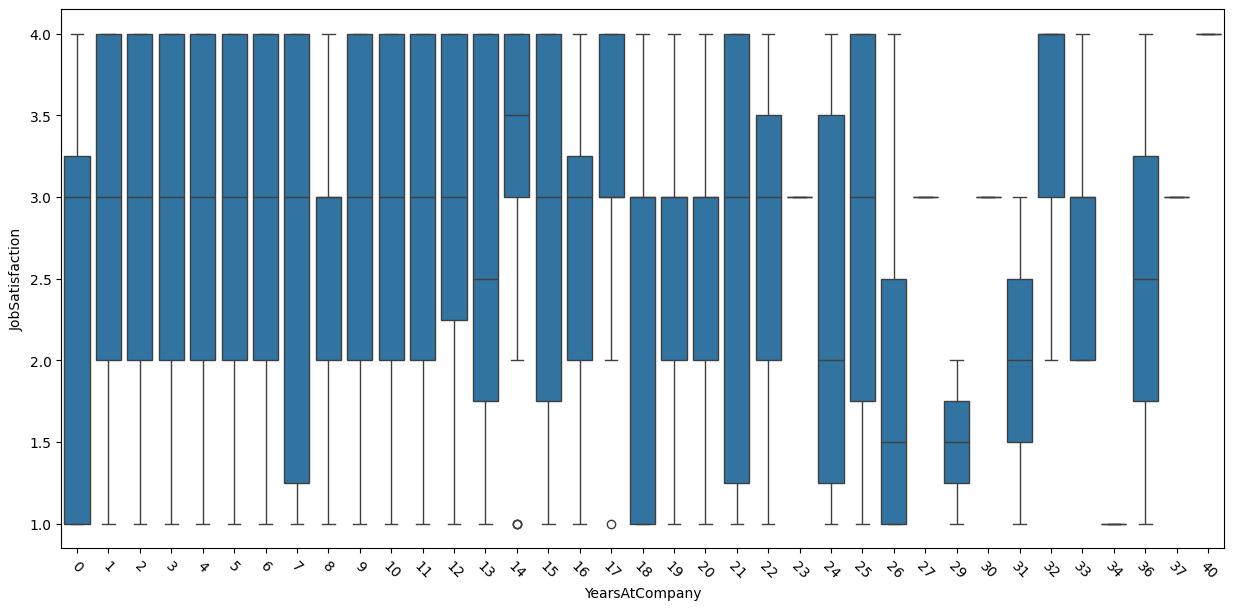

In [ ]:
plt.figure(figsize=(15,7))
snb.boxplot( y = 'JobSatisfaction' ,x ='YearsAtCompany' , data = df)
plt.xticks( rotation = -45)


<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

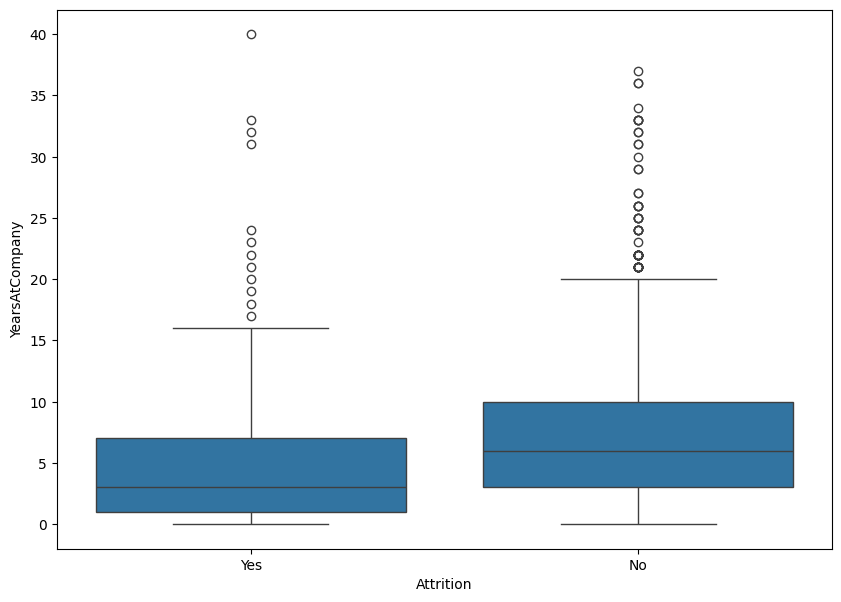

In [ ]:
plt.figure(figsize=(10,7))
snb.boxplot( y = 'YearsAtCompany' ,x ='Attrition' , data = df)

### Report:
- Low salary and short tenure are associated with higher attrition.
- Job satisfaction tends to be lower for those who leave.

**Further Data processing **

In [ ]:
def labelling(avg_sat):

    if avg_sat ==5:
        return 'A'
    if avg_sat ==4:
        return 'B'
    if avg_sat ==3:
        return 'C'
    if avg_sat ==2:
        return 'D'
    if avg_sat ==1:
        return 'E'
    return "F"

In [ ]:
df['JobSatisfaction'] =df.apply(lambda x : labelling(x['JobSatisfaction']) ,axis =1)
df['JobSatisfaction']


,JobSatisfaction
0,B
1,D
2,C
3,C
4,D
...,...
1465,B
1466,E
1467,D
1468,D


In [ ]:
df["JobSatisfaction"].value_counts()

,count
JobSatisfaction,
4,459
3,442
1,289
2,280


In [ ]:

df['Pass_Status'] = np.where(df['PerformanceRating'] < 3, 'F', 'P')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,Attrition_Flag,Pass_Status
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,Low,1,P
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,Low,0,P
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,Low,1,P
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,Low,0,P
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,Low,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,Low,0,P
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,Medium,0,P
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,Low,0,P
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,Low,0,P


**Data Analysis**

<Axes: xlabel='JobSatisfaction', ylabel='count'>

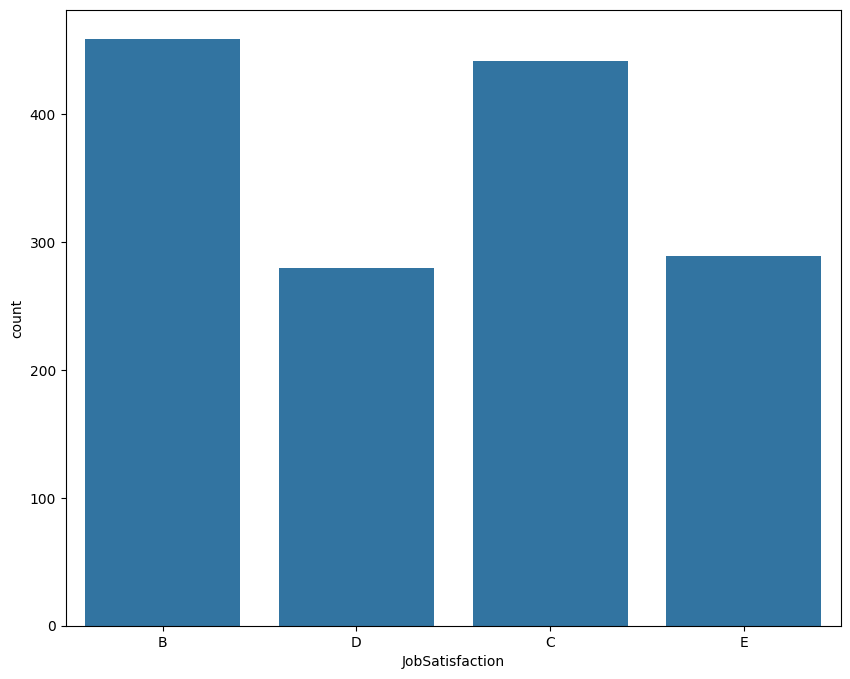

In [ ]:
plt.figure(figsize=(10,8))
snb.countplot(data = df , x = 'JobSatisfaction')

## Report


*   hese letters correspond to scaled satisfaction (e.g., A = very high, E = very low), it suggests most employees fall in the middle-high satisfaction range.

*   D and E could indicate dissatisfaction, which might be linked to higher attrition risk.
*   HR interventions might be most effective when targeted at D and E groups to improve morale and retention.



<Axes: >

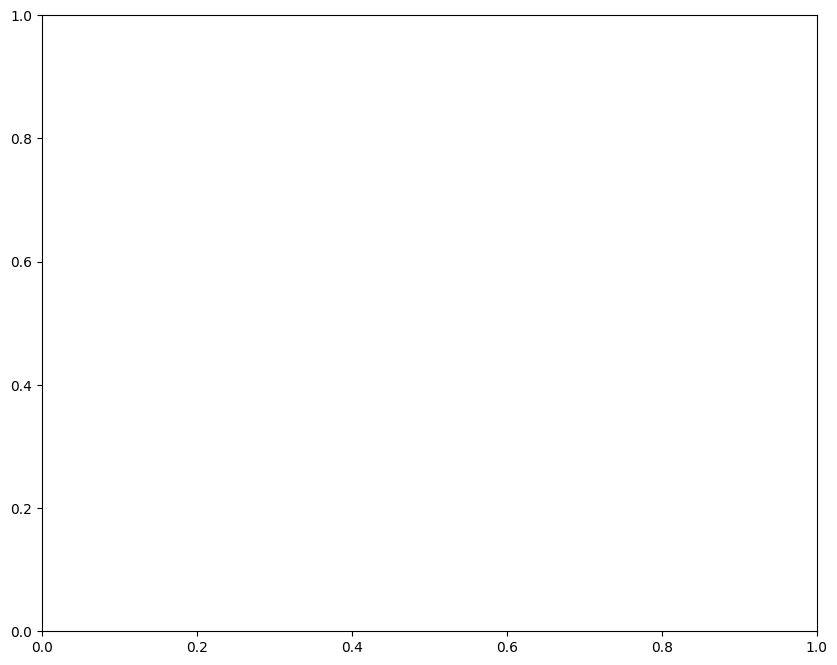

In [ ]:
plt.figure(figsize=(10,8))
snb.countplot(data = df[df["Pass_Status"]=="F"] , x = 'Pass_Status',hue = "Department")

## Report


*   all have been given a passing rating so no contribution to attrition




<Axes: xlabel='Salary', ylabel='JobSatisfaction'>

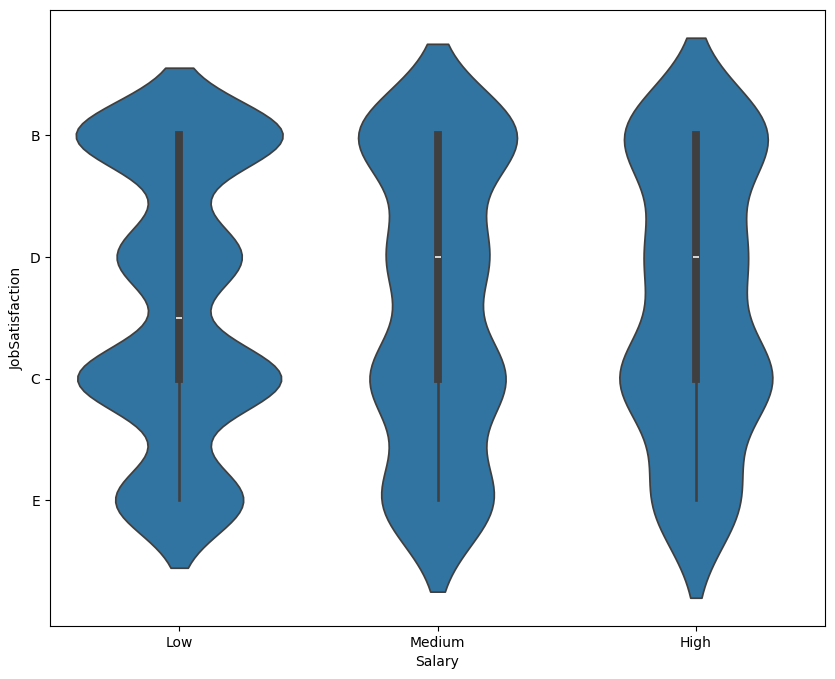

In [ ]:
plt.figure(figsize=(10,8))
snb.violinplot( x = df["Salary"], y = df["JobSatisfaction"] )

### Report:

- **All salary groups** show similar central tendencies (medians), with most values clustered around the middle satisfaction levels.
- However, the **density width** (distribution spread) suggests:
  - **Low salary** employees have more **variation** in satisfaction, indicating mixed feelings (some very dissatisfied, others satisfied).
  - **High salary** employees tend to have a slightly more **uniform and concentrated** satisfaction distribution.
- Overall, while salary alone doesn't perfectly predict satisfaction, higher income seems to correlate with **more consistent and slightly higher satisfaction levels**.


In [ ]:

df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'], errors='coerce')
df['Attrition_Flag'] = pd.to_numeric(df['Attrition_Flag'], errors='coerce')
df_cleaned = df.dropna(subset=['JobSatisfaction', 'Attrition_Flag'])

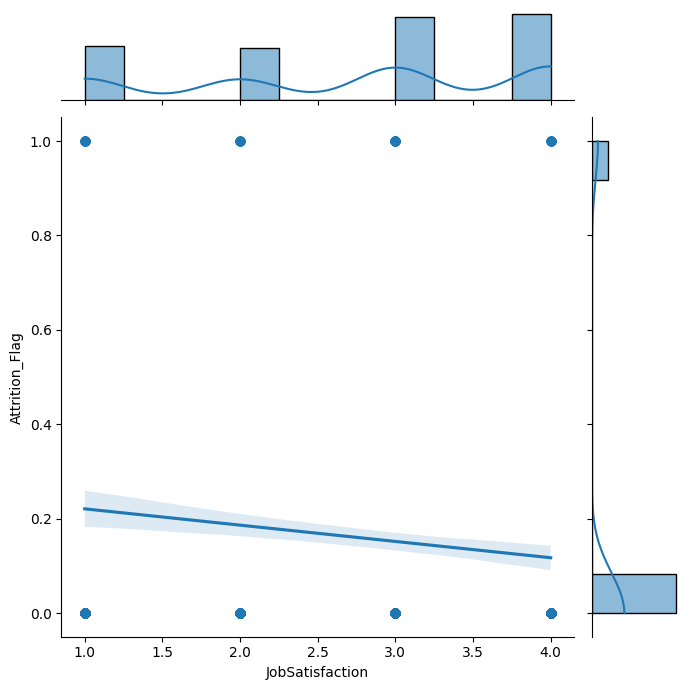

In [ ]:
if df_cleaned.shape[0] == 0:
    print("No data left to plot.")
else:
    snb.jointplot(x='JobSatisfaction', y='Attrition_Flag', data=df_cleaned, kind='reg', height=7)

### Report:

- The **regression line** (with confidence interval) shows a **negative correlation**, indicating:
  - As **Job Satisfaction increases**, the likelihood of attrition **decreases**.
  - Employees with low satisfaction scores (1 or 2) have higher attrition rates.

- The **histograms and KDE curves** on the axes show:
  - More employees report high satisfaction (3 or 4).
  - Attrition is a rare event overall (most employees stayed).

- This supports the insight that **dissatisfied employees are more prone to leave**, reinforcing Job Satisfaction as a key predictor of attrition.


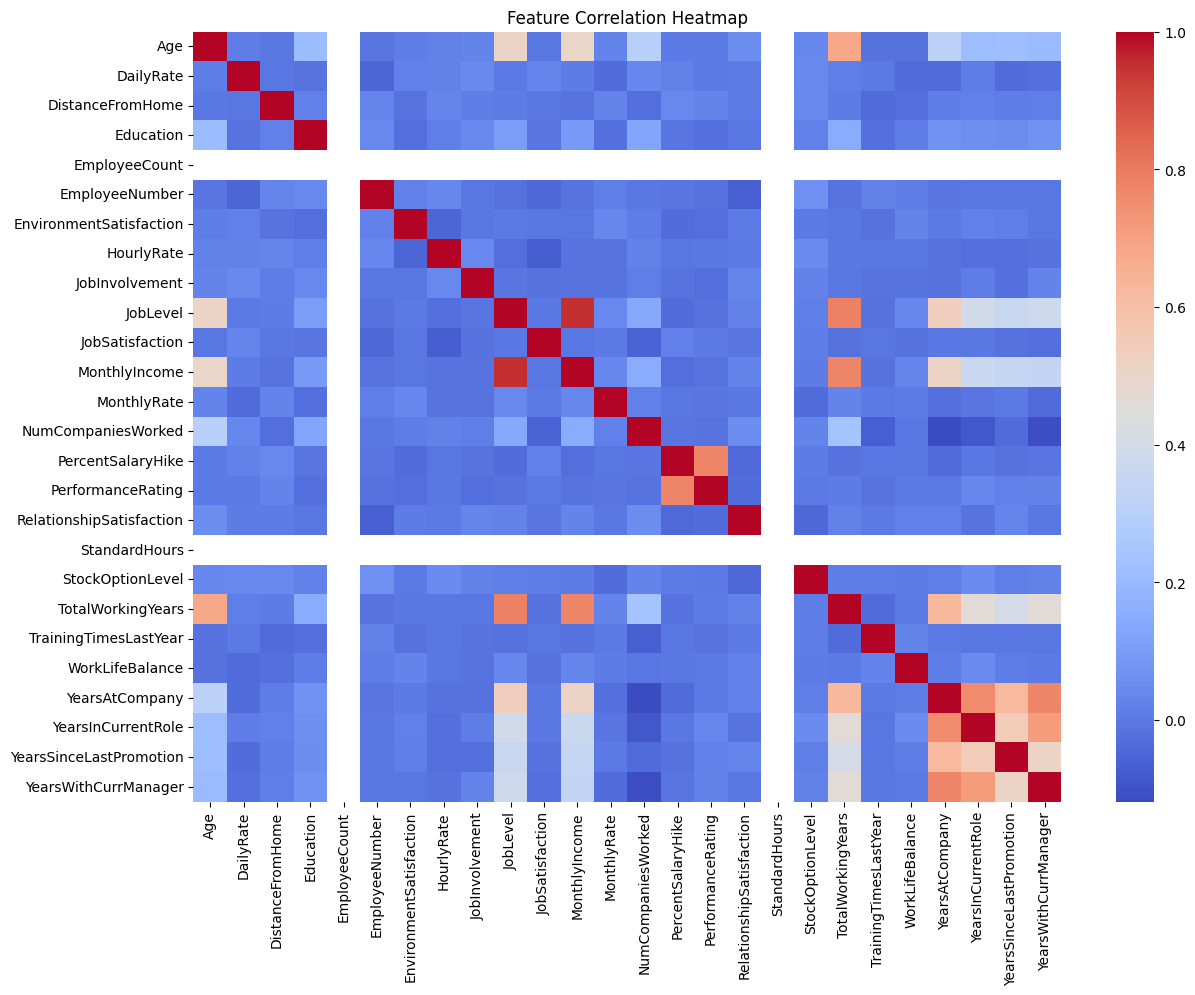

In [ ]:
plt.figure(figsize=(14,10))
snb.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### Report:
- Observed correlation between features like TotalWorkingYears, MonthlyIncome, and YearsAtCompany with Attrition.


Machine Learning Model which can predict if an employee would quit or not depending on the all the details

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dept_dummies = pd.get_dummies(df.Department, drop_first=True)

In [ ]:
dataset = df.drop('Department', axis=1).join(dept_dummies)


In [ ]:
dataset['Salary'] = pd.cut(dataset['MonthlyIncome'],bins=3,labels=['Low', 'Medium', 'High'])
dataset['Salary'].unique()
dataset['Salary'] = dataset['Salary'].astype('category').cat.reorder_categories(['Low', 'Medium', 'High'], ordered=True)



In [ ]:
Salary_numeric = pd.DataFrame(dataset.Salary.cat.codes)
Salary_numeric.columns = ['Salary']


In [ ]:
dataset = dataset.drop(['Salary'], axis=1).join(Salary_numeric)


In [ ]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Salary
0,41,Yes,Travel_Rarely,1102,1,2,Life Sciences,1,1,2,...,8,0,1,6,4,0,5,False,True,0
1,49,No,Travel_Frequently,279,8,1,Life Sciences,1,2,3,...,10,3,3,10,7,1,7,True,False,0
2,37,Yes,Travel_Rarely,1373,2,2,Other,1,4,4,...,7,3,3,0,0,0,0,True,False,0
3,33,No,Travel_Frequently,1392,3,4,Life Sciences,1,5,4,...,8,3,3,8,7,3,0,True,False,0
4,27,No,Travel_Rarely,591,2,1,Medical,1,7,1,...,6,3,3,2,2,2,2,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,Medical,1,2061,3,...,17,3,3,5,2,0,3,True,False,0
1466,39,No,Travel_Rarely,613,6,1,Medical,1,2062,4,...,9,5,3,7,7,1,7,True,False,1
1467,27,No,Travel_Rarely,155,4,3,Life Sciences,1,2064,2,...,6,0,3,6,2,0,3,True,False,0
1468,49,No,Travel_Frequently,1023,2,3,Medical,1,2065,4,...,17,3,2,9,6,0,8,False,True,0


In [ ]:
print('Attrition' in dataset.columns)

True


In [ ]:

dataset['Attrition_Flag'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})

X = dataset.drop(['Attrition','Attrition_Flag', 'JobSatisfaction',], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = dataset['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=6
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
logisticRegr=linear_model.LogisticRegression(penalty='l2', solver='liblinear',
                                      tol=1e-9, max_iter=int(1e9),
                                      warm_start=True,
                                      intercept_scaling=10000.)


In [ ]:

logisticRegr.fit(x_train, y_train)

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000000,
                   solver='liblinear', tol=1e-09, warm_start=True)

In [ ]:
predictions = logisticRegr.predict(x_test)

In [40]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8733031674208145


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[182   0]
 [ 33   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       182
           1       1.00      0.15      0.27        39

    accuracy                           0.85       221
   macro avg       0.92      0.58      0.59       221
weighted avg       0.87      0.85      0.80       221

Accuracy Score: 0.8506787330316742


We Developed a classifier which can predict the the decision made by an employee. The decision is regarding if he or she would quit or not.

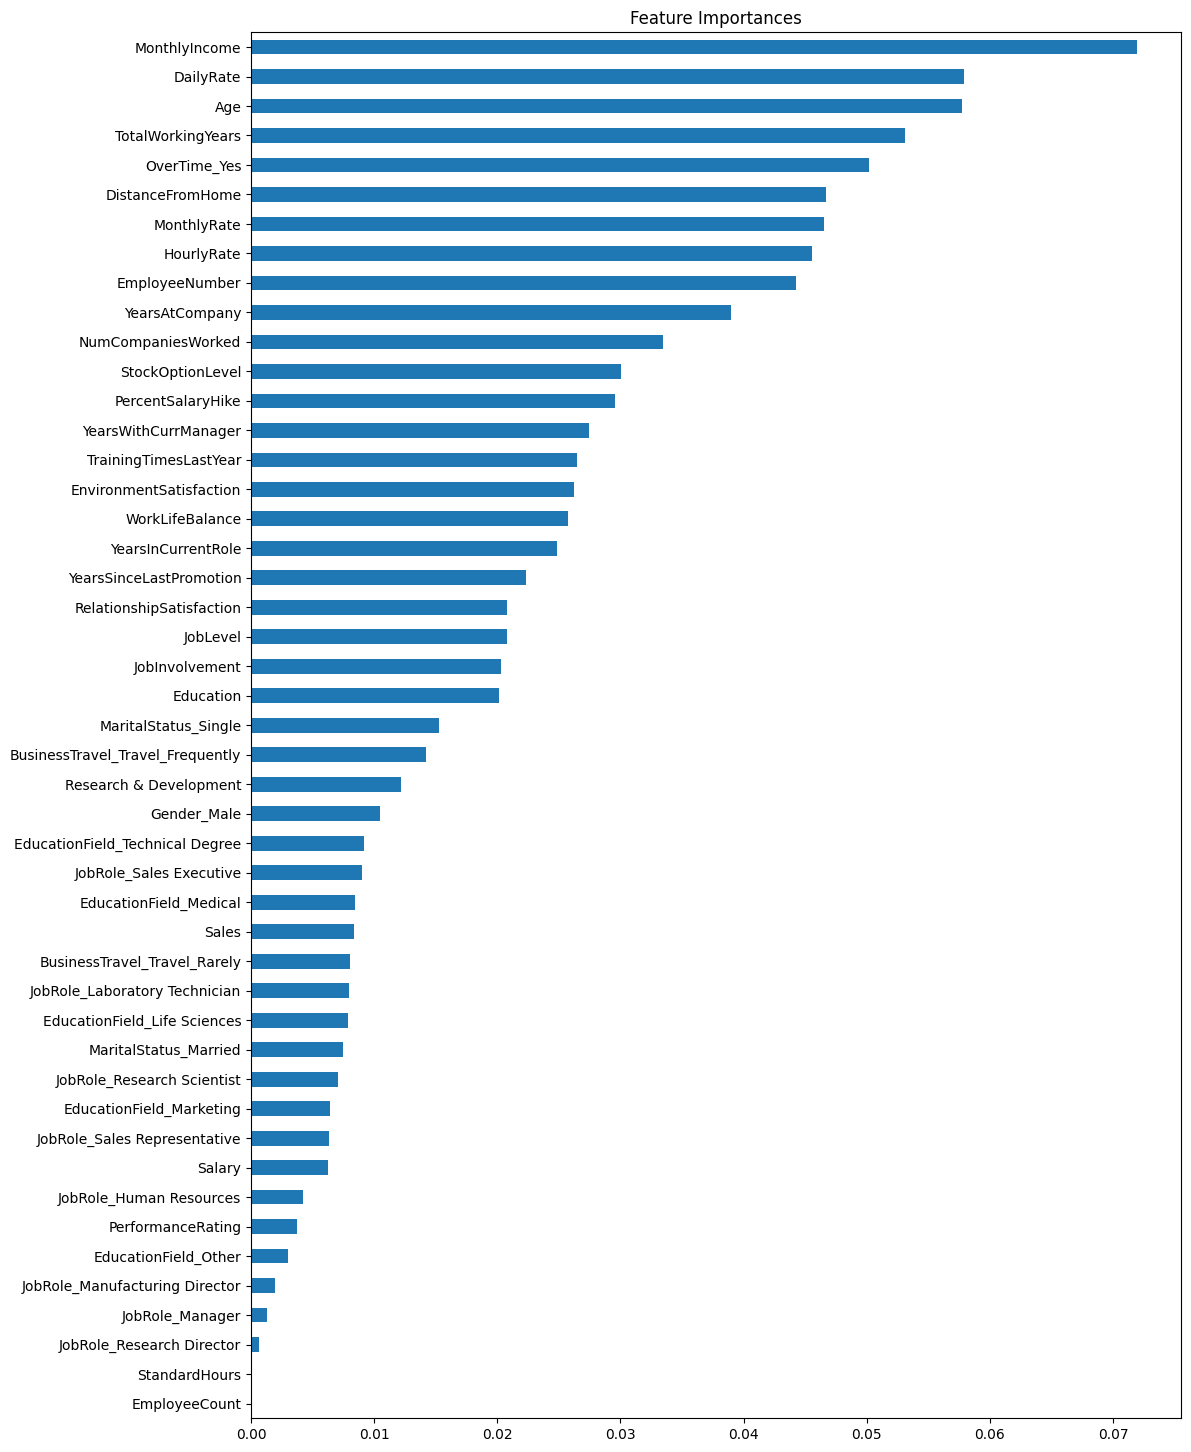

In [ ]:
features = X.columns.tolist()
plt.figure(figsize=(12, 18))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

### Report:
- Daily rate, Age, Monthly rate, overtime and total working years are top predictors of employee attrition.
